In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import prettytable as pt

vti = pd.read_excel('Housseine_Lahjaji_Mehdid.xlsx', sheet_name='VTI', index_col='Date')
enor = pd.read_excel('Housseine_Lahjaji_Mehdid.xlsx', sheet_name='ENOR', index_col='Date')
xrt = pd.read_excel('Housseine_Lahjaji_Mehdid.xlsx', sheet_name='XRT', index_col='Date')

### Exo 1: Présentation des ETF et graphique de l'évolution des cours sur 10 ans

In [4]:
vti['Normalized value'] = (vti['Price'] / vti['Price'].iloc[0]) * 100
enor['Normalized value'] = (enor['Price'] / enor['Price'].iloc[0]) * 100
xrt['Normalized value'] = (xrt['Price'] / xrt['Price'].iloc[0]) * 100

In [5]:
portfolio = (vti['Normalized value'] + enor['Normalized value'] + xrt['Normalized value']) / 3

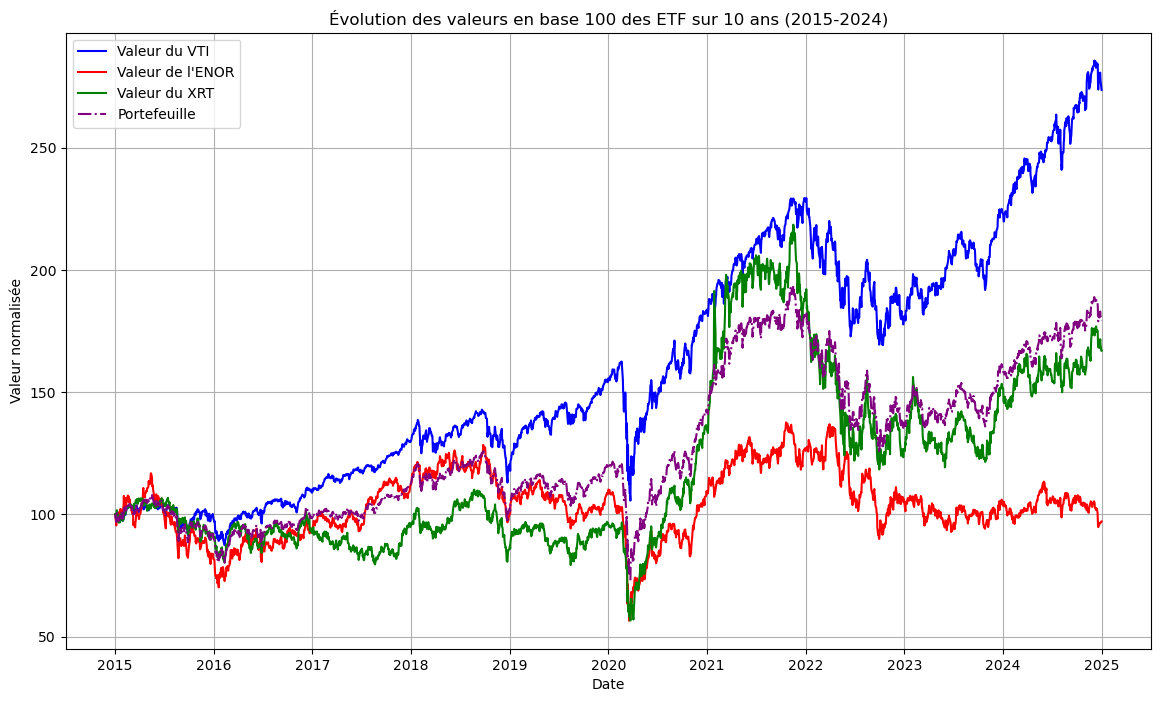

In [6]:
plt.figure(figsize=(14, 8))
plt.plot(vti['Normalized value'], label = 'Valeur du VTI', color = 'blue')
plt.plot(enor['Normalized value'], label = "Valeur de l'ENOR", color = 'red')
plt.plot(xrt['Normalized value'], label = 'Valeur du XRT', color = 'green')
plt.plot(portfolio, label = 'Portefeuille', color = 'purple', linestyle = '-.')
plt.title('Évolution des valeurs en base 100 des ETF sur 10 ans (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Valeur normalisée')
plt.grid(True)
plt.legend()
plt.show()

### Exo 2: Rendements géométriques quotidiens et tests

In [7]:
vti['Returns'] = vti['Price'].pct_change().dropna()

enor['Returns'] = enor['Price'].pct_change().dropna()

xrt['Returns'] = xrt['Price'].pct_change().dropna()

data_returns = pd.concat([vti['Returns'], enor['Returns'], xrt['Returns']], axis=1)

data_returns.columns = ['VTI Returns', 'ENOR Returns', 'XRT Returns']

data_returns = data_returns.dropna()

data_returns

,VTI Returns,ENOR Returns,XRT Returns
Date,,,
2015-01-05,-0.017183,-0.032439,-0.011328
2015-01-06,-0.009798,-0.012964,-0.010609
2015-01-07,0.011932,0.026721,0.026163
2015-01-08,0.017640,0.017203,0.013375
2015-01-09,-0.008290,-0.010841,-0.017942
...,...,...,...
2024-12-24,0.010612,0.006309,0.007237
2024-12-26,0.000572,0.000000,0.013751
2024-12-27,-0.010831,0.000448,-0.012343


In [8]:
stat_rendements = data_returns.describe(include = 'all')

stat_rendements

,VTI Returns,ENOR Returns,XRT Returns
count,2539.000000,2539.000000,2539.000000
mean,0.000461,0.000112,0.000342
std,0.011293,0.015660,0.016709
min,-0.113809,-0.146100,-0.124618
25%,-0.003988,-0.007493,-0.008628
50%,0.000565,0.000481,0.000236
75%,0.005872,0.008823,0.009474
max,0.094898,0.126108,0.120349


In [9]:
# Calcul du rendement hebdomadaire moyen du Nasdaq
mean_return_vti = data_returns['VTI Returns'].mean()

# Calcul du rendement annualisé composé
annualized_return_vti = (1 + mean_return_vti) ** 252 - 1


# Calcul du rendement hebdomadaire moyen du Gold
mean_return_enor = data_returns['ENOR Returns'].mean()

# Calcul du rendement annualisé composé
annualized_return_enor = (1 + mean_return_enor) ** 252 - 1


# Calcul du rendement hebdomadaire moyen du Nikkei
mean_return_xrt = data_returns['XRT Returns'].mean()

# Calcul du rendement annualisé composé
annualized_return_xrt = (1 + mean_return_xrt) ** 252 - 1

rendements_etf = pt.PrettyTable(["ETF", "Rendement journalier moyen", "Rendement annualisé composé"])

rendements_etf.add_row(["VTI", f"{mean_return_vti * 100:.3f}%", f"{annualized_return_vti * 100:.3f}%"])
rendements_etf.add_row(["ENOR", f"{mean_return_enor * 100:.3f}%", f"{annualized_return_enor * 100:.3f}%"])
rendements_etf.add_row(["XRT", f"{mean_return_xrt * 100:.3f}%", f"{annualized_return_xrt * 100:.3f}%"])

# Extraire les lignes et les colonnes à partir de PrettyTable
rows = [row for row in rendements_etf._rows]
columns = rendements_etf.field_names

# Convertir en DataFrame pandas
rendements_etf = pd.DataFrame(rows, columns=columns)

rendements_etf

,ETF,Rendement journalier moyen,Rendement annualisé composé
0,VTI,0.046%,12.304%
1,ENOR,0.011%,2.873%
2,XRT,0.034%,8.991%


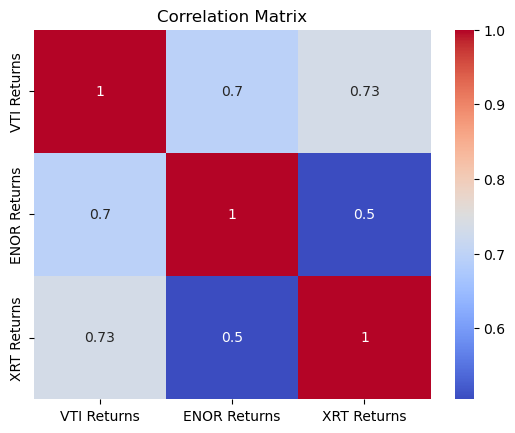

In [10]:
# Calcul de la matrice de corrélation
correlation_matrix = data_returns.corr()

# Visualisation en heat map de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [11]:
from statsmodels.tsa.stattools import acf #type: ignore

acf_vti = acf(data_returns['VTI Returns'], nlags=30)
acf_enor = acf(data_returns['ENOR Returns'], nlags=30)
acf_xrt = acf(data_returns['XRT Returns'], nlags=30)

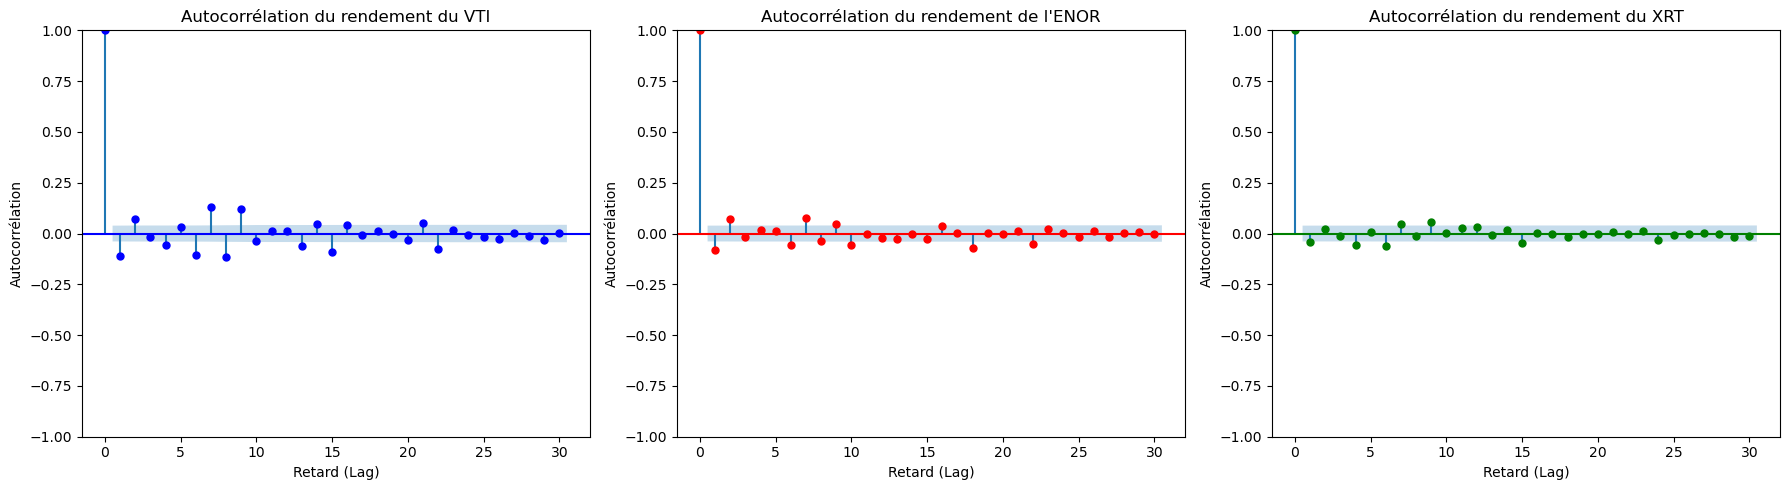

In [12]:
from statsmodels.graphics.tsaplots import plot_acf #type: ignore

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fonction d'autocorrélation du rendement du Nasdaq
plot_acf(data_returns['VTI Returns'], lags=30, ax=axes[0], color='blue')
axes[0].set_title("Autocorrélation du rendement du VTI")
axes[0].set_xlabel("Retard (Lag)")
axes[0].set_ylabel("Autocorrélation")

# Fonction d'autocorrélation du rendement du Gold
plot_acf(data_returns['ENOR Returns'], lags=30, ax=axes[1], color='red')
axes[1].set_title("Autocorrélation du rendement de l'ENOR")
axes[1].set_xlabel("Retard (Lag)")
axes[1].set_ylabel("Autocorrélation")

# Fonction d'autocorrélation du rendement du Nikkei 225
plot_acf(data_returns['XRT Returns'], lags=30, ax=axes[2], color='green')
axes[2].set_title("Autocorrélation du rendement du XRT")
axes[2].set_xlabel("Retard (Lag)")
axes[2].set_ylabel("Autocorrélation")

plt.tight_layout()
plt.show()

### Exo 3: Modèle GARCH et application

In [22]:
data_returns = data_returns * 100

In [23]:
# Modèle GARCH(1,1) pour le rendement du VTI

import arch #type: ignore
from arch import arch_model #type: ignore

model_vti = arch_model(data_returns['VTI Returns'], vol='Garch', p=1, q=1)
garch_vti = model_vti.fit()

results_vti = garch_vti.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 26544.592403538776
Iteration:      2,   Func. Count:     16,   Neg. LLF: 14562.99130581373
Iteration:      3,   Func. Count:     26,   Neg. LLF: 5029.567264846776
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1087749271.4594092
Iteration:      5,   Func. Count:     39,   Neg. LLF: 3446.9918671478454
Iteration:      6,   Func. Count:     45,   Neg. LLF: 3305.1251293782143
Iteration:      7,   Func. Count:     51,   Neg. LLF: 3301.508137185757
Iteration:      8,   Func. Count:     57,   Neg. LLF: 3300.4369084489545
Iteration:      9,   Func. Count:     62,   Neg. LLF: 3300.43687900498
Iteration:     10,   Func. Count:     67,   Neg. LLF: 3300.436878424228
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3300.436878424228
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10


In [24]:
model_enor = arch_model(data_returns['ENOR Returns'], vol='Garch', p=1, q=1)
garch_enor = model_enor.fit()

results_enor = garch_enor.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15144.065108123737
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1139175.0368807432
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5071.243249232147
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4991.282329051741
Iteration:      5,   Func. Count:     38,   Neg. LLF: 4396.8205804631325
Iteration:      6,   Func. Count:     44,   Neg. LLF: 4396.449293604826
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4396.449175064051
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4396.449173988366
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4396.449173989666
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4396.449173988366
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


In [25]:
model_xrt = arch_model(data_returns['XRT Returns'], vol='Garch', p=1, q=1)
garch_xrt = model_xrt.fit()

results_xrt = garch_xrt.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7715.896508052748
Iteration:      2,   Func. Count:     16,   Neg. LLF: 24763.45052572482
Iteration:      3,   Func. Count:     24,   Neg. LLF: 10410.704336972478
Iteration:      4,   Func. Count:     32,   Neg. LLF: 9136.4361284667
Iteration:      5,   Func. Count:     39,   Neg. LLF: 4566.347323734362
Iteration:      6,   Func. Count:     44,   Neg. LLF: 4566.347322967527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4566.347322967527
            Iterations: 6
            Function evaluations: 44
            Gradient evaluations: 6


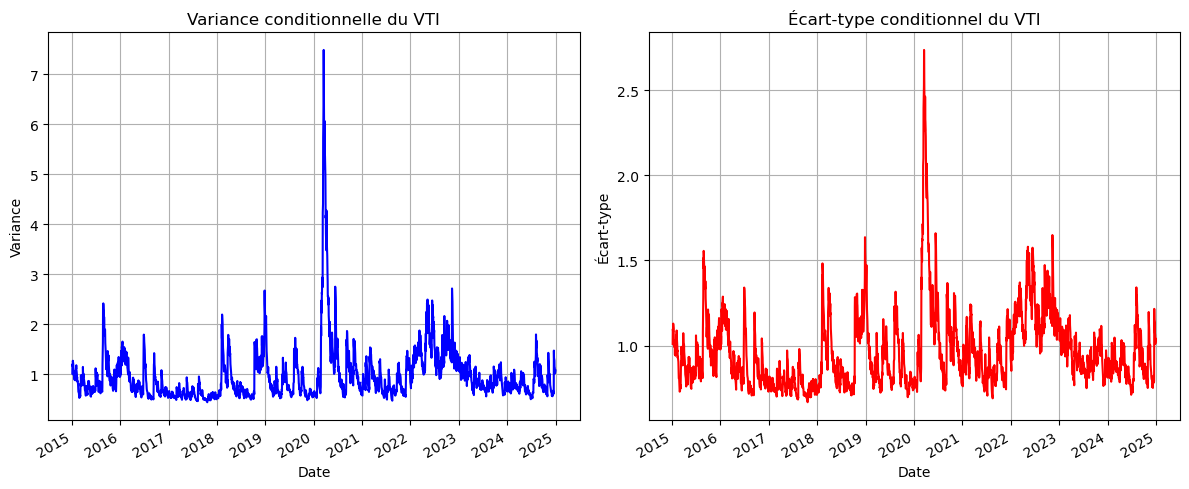

In [26]:
# Représentation graphique de la variance conditionnelle estimée pour le VTI et de l'écart-type conditionnel

vti_std = garch_vti.conditional_volatility.apply(np.sqrt)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
garch_vti.conditional_volatility.plot(ax=axes[0], color = 'blue')
axes[0].set_title('Variance conditionnelle du VTI')
axes[0].set_ylabel('Variance')
axes[0].set_xlabel('Date')
axes[0].grid(True)
vti_std.plot(ax=axes[1], color = 'red')
axes[1].set_title('Écart-type conditionnel du VTI')
axes[1].set_ylabel('Écart-type')
axes[1].set_xlabel('Date')
axes[1].grid(True)
plt.tight_layout()
plt.show()

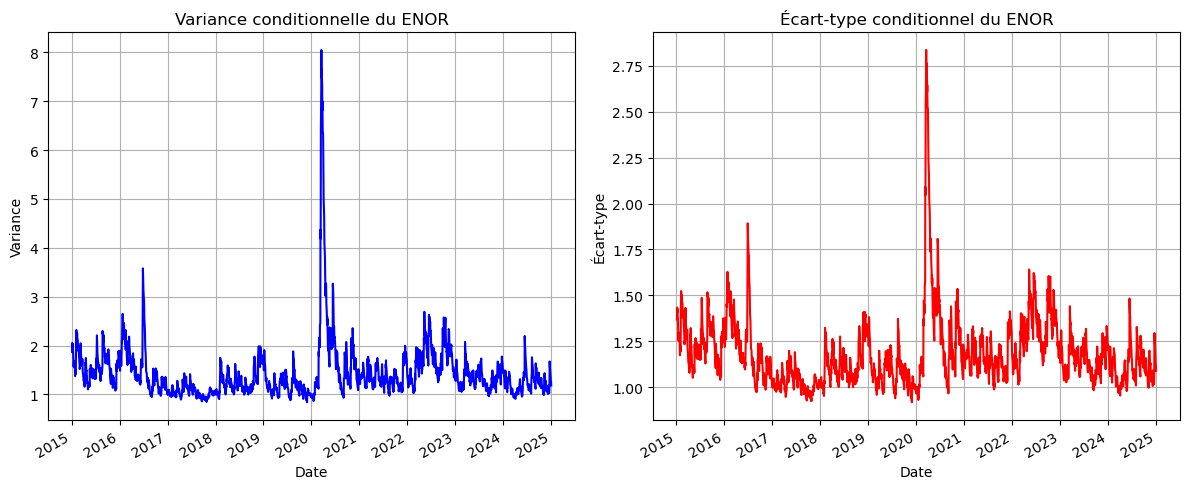

In [27]:
# Représentation graphique de la variance conditionnelle estimée pour le ENOR  et de l'écart-type conditionnel

enor_std = garch_enor.conditional_volatility.apply(np.sqrt)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
garch_enor.conditional_volatility.plot(ax=axes[0], color = 'blue')
axes[0].set_title('Variance conditionnelle du ENOR')
axes[0].set_ylabel('Variance')
axes[0].set_xlabel('Date')
axes[0].grid(True)

enor_std.plot(ax=axes[1], color = 'red')
axes[1].set_title('Écart-type conditionnel du ENOR')
axes[1].set_ylabel('Écart-type')
axes[1].set_xlabel('Date')
axes[1].grid(True)
plt.tight_layout()
plt.show()

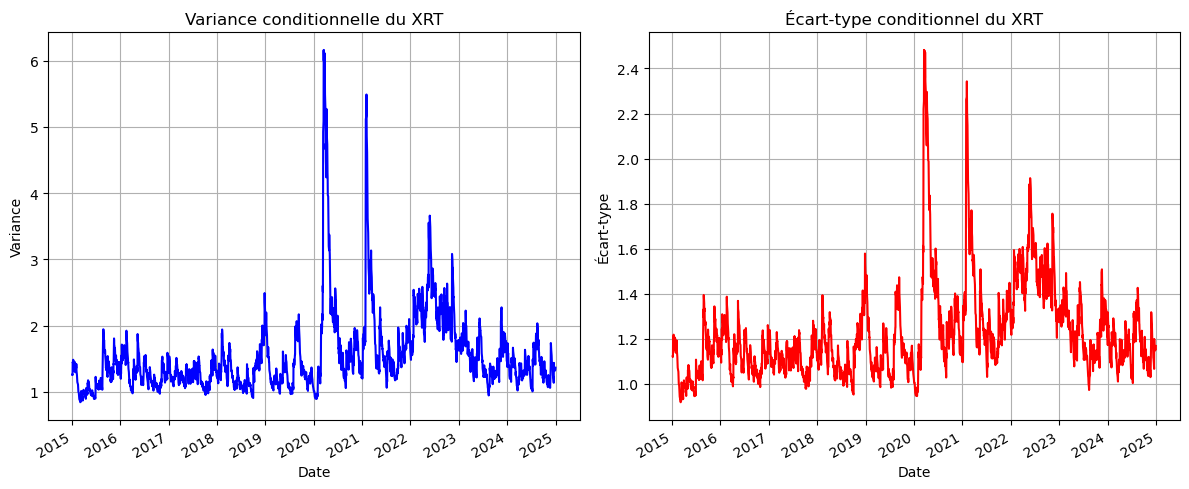

In [28]:
# Représentation graphique de la variance conditionnelle estimée pour le XRT et de l'écart-type conditionnel

xrt_std = garch_xrt.conditional_volatility.apply(np.sqrt)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
garch_xrt.conditional_volatility.plot(ax=axes[0], color = 'blue')
axes[0].set_title('Variance conditionnelle du XRT')
axes[0].set_ylabel('Variance')
axes[0].set_xlabel('Date')
axes[0].grid(True)
xrt_std.plot(ax=axes[1], color = 'red')
axes[1].set_title('Écart-type conditionnel du XRT')
axes[1].set_ylabel('Écart-type')
axes[1].set_xlabel('Date')
axes[1].grid(True)
plt.tight_layout()
plt.show()

### Exo 4: Modèle GARCH multivariés et application

In [19]:
return_vti = data_returns['VTI Returns']
return_enor = data_returns['ENOR Returns']
return_xrt = data_returns['XRT Returns']

returns_vti_enor = data_returns[['VTI Returns', 'ENOR Returns']]
returns_vti_xrt = data_returns[['VTI Returns', 'XRT Returns']]

In [29]:
pip install git+https://github.com/Yaskoi/ysk_garch.git

  Cloning https://github.com/Yaskoi/ysk_garch.git to c:\users\houss\appdata\local\temp\pip-req-build-fgnflcdg
  Resolved https://github.com/Yaskoi/ysk_garch.git to commit 2a9fbdda96033f75e9d410076db6cb78465320c5
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ysk_garch: filename=ysk_garch-0.1-py3-none-any.whl size=3166 sha256=2dc65c1e3cbf0fd562342c9168663e67af09a1ca712e705b32ce1d073ad38403
  Stored in directory: C:\Users\houss\AppData\Local\Temp\pip-ephem-wheel-cache-7udhulyr\wheels\2a\07\c6\d1217d608cf6fe1750fb1b2c4743bb5884388a378a017c0ee8
Successfully built ysk_garch
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/Yaskoi/ysk_garch.git 'C:\Users\houss\AppData\Local\Temp\pip-req-build-fgnflcdg'
  DEPRECATION: Building 'ysk_garch' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ysk_garch'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [30]:
from ysk_garch import DiagonalBEKK, FullBEKK

c:\Users\houss\anaconda3\Lib\site-packages\ysk_garch\BEKK.py:51: RuntimeWarning: overflow encountered in matmul
  H += G_list[j] @ H_t[-j-1] @ G_list[j].T
c:\Users\houss\anaconda3\Lib\site-packages\ysk_garch\BEKK.py:51: RuntimeWarning: invalid value encountered in matmul
  H += G_list[j] @ H_t[-j-1] @ G_list[j].T
c:\Users\houss\anaconda3\Lib\site-packages\numpy\linalg\_linalg.py:2371: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


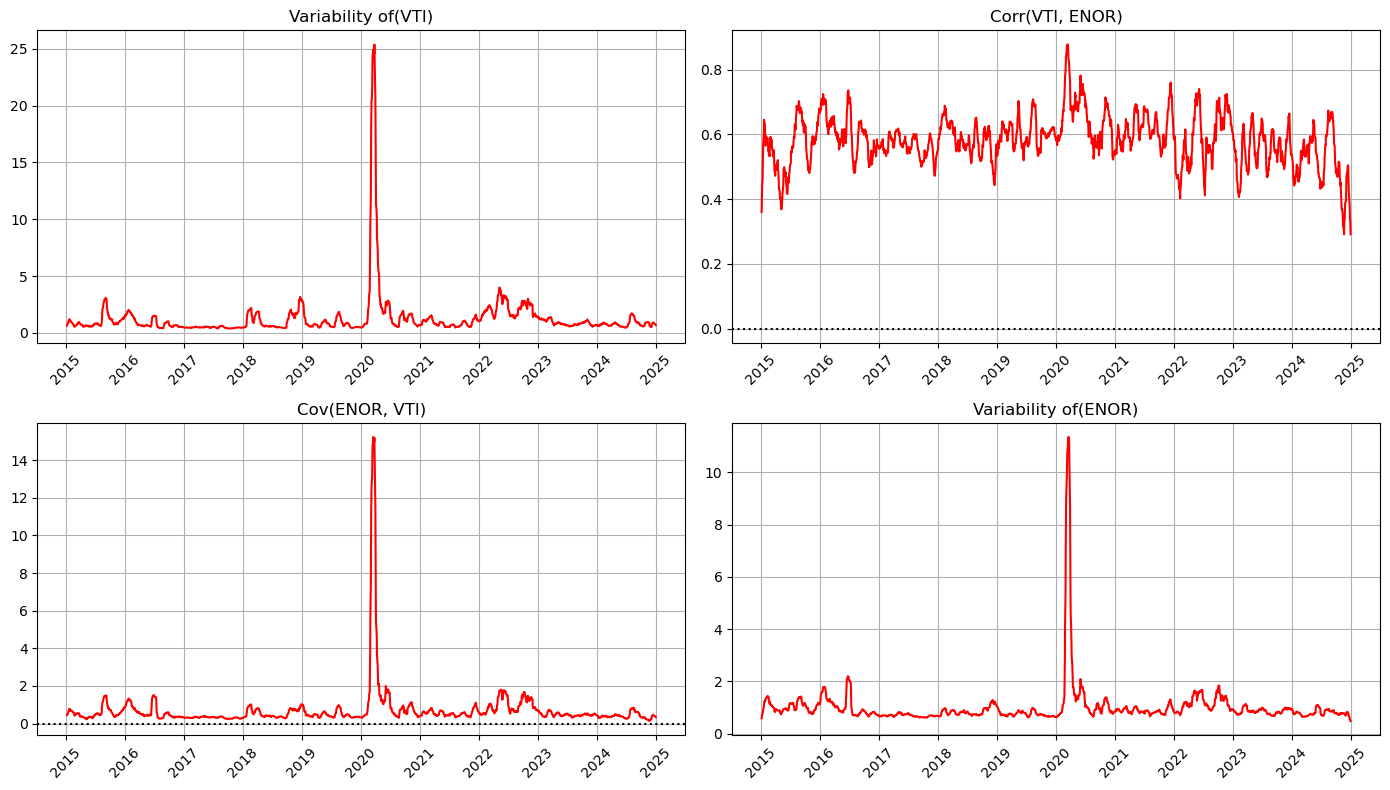

In [31]:
model_1 = DiagonalBEKK(returns_vti_enor, p=1, q=1, asset_names=["VTI", "ENOR"], dates=returns_vti_enor.index, standardize=True)
model_1.fit()
model_1.plot_conditional_covariances(smooth_window=21) # Fenêtre de lissage de 21 jours pour plus de clarté dans les graphiques

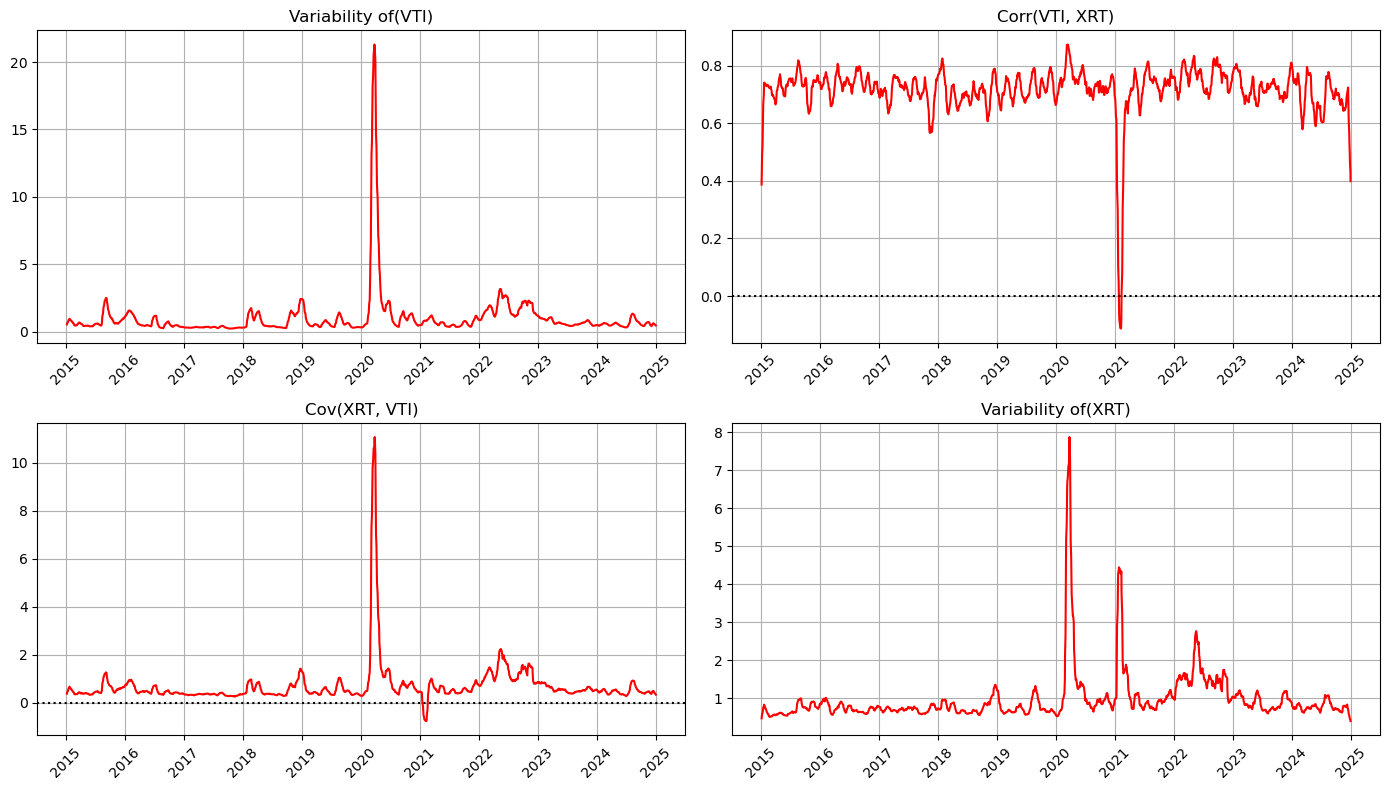

In [32]:
model_2 = DiagonalBEKK(returns_vti_xrt, p=1, q=1, asset_names=["VTI", "XRT"], dates=returns_vti_xrt.index, standardize=True)
model_2.fit()
model_2.plot_conditional_covariances(smooth_window=21) # Fenêtre de lissage de 21 jours pour plus de clarté dans les graphiques

### Exo 5: Modèle VAR et Application

In [34]:
data_returns = data_returns / 100

In [35]:
# Modèle Var pour les rendements du VTI, de l'ENOR et du XRT
from statsmodels.tsa.api import VAR

model_var = VAR(data_returns)
var_result = model_var.fit()
var_result.summary()

c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Jul, 2025
Time:                     18:05:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -26.8891
Nobs:                     2538.00    HQIC:                  -26.9067
Log likelihood:           23365.6    FPE:                2.04268e-12
AIC:                     -26.9168    Det(Omega_mle):     2.03305e-12
--------------------------------------------------------------------
Results for equation VTI Returns
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.000528         0.000223            2.372           0.018
L1.VTI Returns         -0.171534         0.034907           -4.914           0.000
L1.ENOR Returns         0.002906         0.019

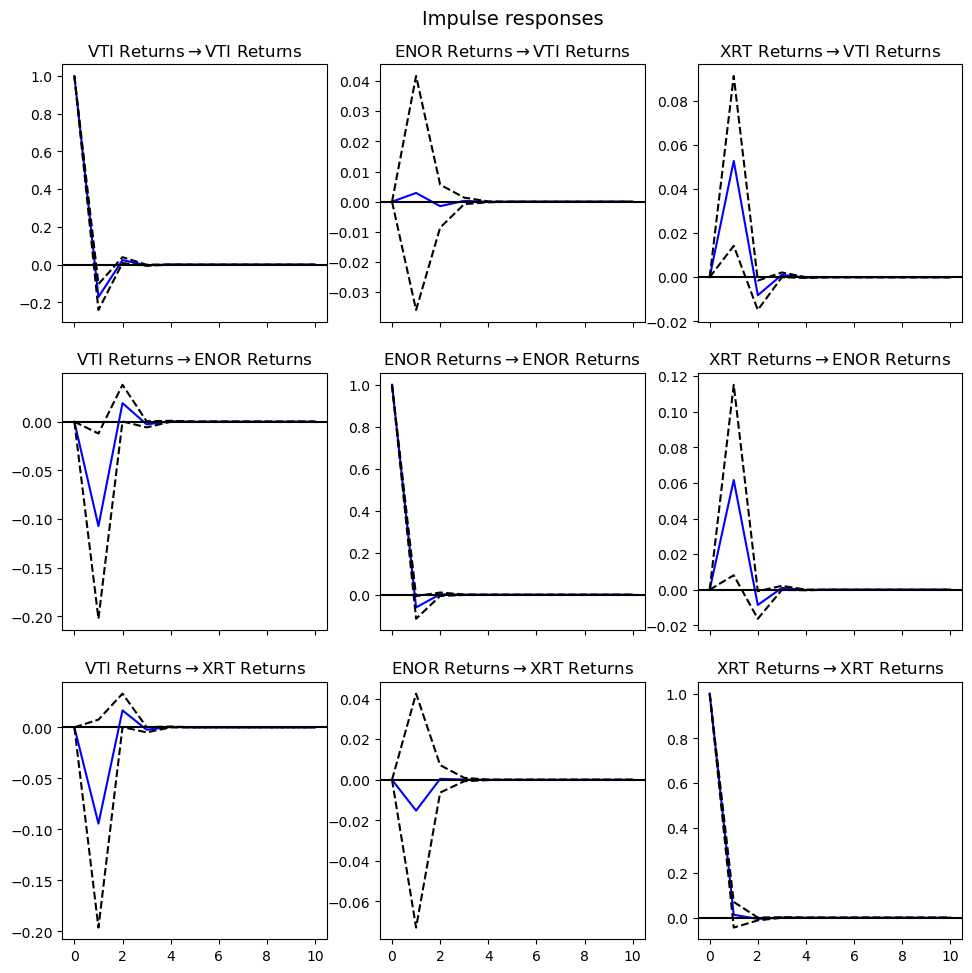

In [36]:
# Fonction de réponse impulsionnelle (IRF) pour le modèle VAR

irf = var_result.irf(10)  # Calcul des IRF pour 10 périodes
irf.plot(orth=False)  # orth=False pour les IRF non orthogonales
plt.show()